In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df1 = pd.read_csv('./complex_20230308.csv', header=None)
df1.columns = ['old_addr_idx', 'complex_name', 'property_type','시도','시군구',
               '읍면동','리','road_name','road_code','admin_dong_code','postal_code','jibun_main','jibun_sub','updated']

df2 = pd.read_csv('./property_20230308.csv', header=None)
df2.columns = ['pk','old_addr_idx','dong','ho','official_price','net_leasable_area','updated']

df_tot = df2.merge(df1, on='old_addr_idx')

df_apt_tot = df_tot[df_tot['property_type']=='apartment']

pd.options.display.max_columns = None
df_apt_tot['평수'] = df_apt_tot['net_leasable_area'] / 3.3

ranges = [(0, 10, '10평 미만'), (10, 20, '10평대'), (20, 30, '20평대'), (30, 40, '30평대'), (40,50,'40평대'), (50,60,'50평대'),(60,70,'60평대'),(70,80,'70평대'),(80,100,'80평대'),(90,180,'90평대 이상')]

labels = [r[2] for r in ranges]
bins = [r[0] for r in ranges] + [ranges[-1][1]]

df_apt_tot['평형'] = pd.cut(df_apt_tot['평수'], bins=bins, labels=labels, include_lowest=True, right=False)

<ipython-input-1-fa5d91bb15be>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['평수'] = df_apt_tot['net_leasable_area'] / 3.3
<ipython-input-1-fa5d91bb15be>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['평형'] = pd.cut(df_apt_tot['평수'], bins=bins, labels=labels, include_lowest=True, right=False)


In [2]:
sido_list = df_apt_tot['시도'].unique()

In [3]:
df_apt_seoul = df_apt_tot[df_apt_tot['시도'] == '서울특별시']
seoul_list = df_apt_seoul['시군구'].unique()
seoul_list

array(['종로구', '중구', '동대문구', '성동구', '성북구', '도봉구', '서대문구', '은평구', '마포구',
       '용산구', '영등포구', '동작구', '강남구', '강동구', '강서구', '구로구', '관악구', '송파구',
       '중랑구', '노원구', '서초구', '양천구', '강북구', '광진구', '금천구'], dtype=object)

In [4]:
df_apt_seoul

,pk,old_addr_idx,dong,ho,official_price,net_leasable_area,updated_x,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated_y,평수,평형
0,00000001_0001_0001,1111010100_00004_00007_apartment,단일,101,1249000000,211.13,2021-01-01,신구파인힐,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,7,2021-01-01,63.978788,60평대
1,00000001_0001_0002,1111010100_00004_00007_apartment,단일,102,1076000000,209.21,2021-01-01,신구파인힐,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,7,2021-01-01,63.396970,60평대
2,00000001_0001_0003,1111010100_00004_00007_apartment,단일,201,1140000000,207.89,2021-01-01,신구파인힐,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,7,2021-01-01,62.996970,60평대
3,00000001_0001_0004,1111010100_00004_00007_apartment,단일,202,1249000000,215.09,2021-01-01,신구파인힐,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,7,2021-01-01,65.178788,60평대
4,00000001_0001_0005,1111010100_00004_00007_apartment,단일,301,1332000000,219.33,2021-01-01,신구파인힐,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,7,2021-01-01,66.463636,60평대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642017,20431555_0001_0016,1165010100_00878_00022_apartment,단일,504,381000000,27.95,2021-11-01,ASTRO(878-22),apartment,서울특별시,서초구,방배동,\N,서초대로29길,116504163397,1165062100,06588,878,22,2021-11-01,8.469697,10평 미만
14642018,20431555_0001_0017,1165010100_00878_00022_apartment,단일,601,289000000,20.59,2021-11-01,ASTRO(878-22),apartment,서울특별시,서초구,방배동,\N,서초대로29길,116504163397,1165062100,06588,878,22,2021-11-01,6.239394,10평 미만
14642019,20431555_0001_0018,1165010100_00878_00022_apartment,단일,602,316000000,22.56,2021-11-01,ASTRO(878-22),apartment,서울특별시,서초구,방배동,\N,서초대로29길,116504163397,1165062100,06588,878,22,2021-11-01,6.836364,10평 미만
14642020,20431555_0001_0019,1165010100_00878_00022_apartment,단일,603,355000000,26.09,2021-11-01,ASTRO(878-22),apartment,서울특별시,서초구,방배동,\N,서초대로29길,116504163397,1165062100,06588,878,22,2021-11-01,7.906061,10평 미만


In [17]:
ex = df_apt_seoul.groupby('평형').mean()
ex

<ipython-input-17-d28b3b63221c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ex = df_apt_seoul.groupby('평형').mean()


,official_price,net_leasable_area,평수
평형,,,
10평대,"320,762,119",45,14
20평대,"782,019,532",82,25
30평대,"1,163,247,181",115,35
40평대,"1,626,125,412",145,44
50평대,"2,053,620,196",178,54
60평대,"2,324,213,611",212,64
70평대,"2,787,199,956",242,73
80-90평대,"4,129,113,744",279,84
100-120평대,"4,464,142,857",378,114


In [10]:
dfg = df_apt_seoul[df_apt_seoul['시군구'] == '강남구'].groupby('평형').mean().reset_index()
dfsc = df_apt_seoul[df_apt_seoul['시군구'] == '서초구'].groupby('평형').mean().reset_index()
dfsp = df_apt_seoul[df_apt_seoul['시군구'] == '송파구'].groupby('평형').mean().reset_index()

<ipython-input-10-b9871482f360>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df_apt_seoul[df_apt_seoul['시군구'] == '강남구'].groupby('평형').mean().reset_index()
<ipython-input-10-b9871482f360>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsc = df_apt_seoul[df_apt_seoul['시군구'] == '서초구'].groupby('평형').mean().reset_index()
<ipython-input-10-b9871482f360>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsp = df

In [11]:
df_filtered = df_apt_seoul[df_apt_seoul['시군구'].isin(['강남구', '서초구', '송파구'])]
df_filtered

,pk,old_addr_idx,dong,ho,official_price,net_leasable_area,updated_x,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated_y,평수,평형
289526,00001159_0001_0001,1168010700_00510_00011_apartment,단일,301,382000000,66.15,2022-01-01,강남상가,apartment,서울특별시,강남구,신사동,NaN,압구정로2길,116804166515,1168051000,06034,510,11,2021-01-01,20.045455,20평대
289527,00001159_0001_0002,1168010700_00510_00011_apartment,단일,302,382000000,65.72,2022-01-01,강남상가,apartment,서울특별시,강남구,신사동,NaN,압구정로2길,116804166515,1168051000,06034,510,11,2021-01-01,19.915152,10평대
289528,00001159_0001_0003,1168010700_00510_00011_apartment,단일,303,382000000,65.72,2022-01-01,강남상가,apartment,서울특별시,강남구,신사동,NaN,압구정로2길,116804166515,1168051000,06034,510,11,2021-01-01,19.915152,10평대
289529,00001159_0001_0004,1168010700_00510_00011_apartment,단일,305,382000000,65.72,2022-01-01,강남상가,apartment,서울특별시,강남구,신사동,NaN,압구정로2길,116804166515,1168051000,06034,510,11,2021-01-01,19.915152,10평대
289530,00001159_0001_0005,1168010700_00510_00011_apartment,단일,306,382000000,65.72,2022-01-01,강남상가,apartment,서울특별시,강남구,신사동,NaN,압구정로2길,116804166515,1168051000,06034,510,11,2021-01-01,19.915152,10평대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642017,20431555_0001_0016,1165010100_00878_00022_apartment,단일,504,381000000,27.95,2021-11-01,ASTRO(878-22),apartment,서울특별시,서초구,방배동,\N,서초대로29길,116504163397,1165062100,06588,878,22,2021-11-01,8.469697,10평 미만
14642018,20431555_0001_0017,1165010100_00878_00022_apartment,단일,601,289000000,20.59,2021-11-01,ASTRO(878-22),apartment,서울특별시,서초구,방배동,\N,서초대로29길,116504163397,1165062100,06588,878,22,2021-11-01,6.239394,10평 미만
14642019,20431555_0001_0018,1165010100_00878_00022_apartment,단일,602,316000000,22.56,2021-11-01,ASTRO(878-22),apartment,서울특별시,서초구,방배동,\N,서초대로29길,116504163397,1165062100,06588,878,22,2021-11-01,6.836364,10평 미만
14642020,20431555_0001_0019,1165010100_00878_00022_apartment,단일,603,355000000,26.09,2021-11-01,ASTRO(878-22),apartment,서울특별시,서초구,방배동,\N,서초대로29길,116504163397,1165062100,06588,878,22,2021-11-01,7.906061,10평 미만


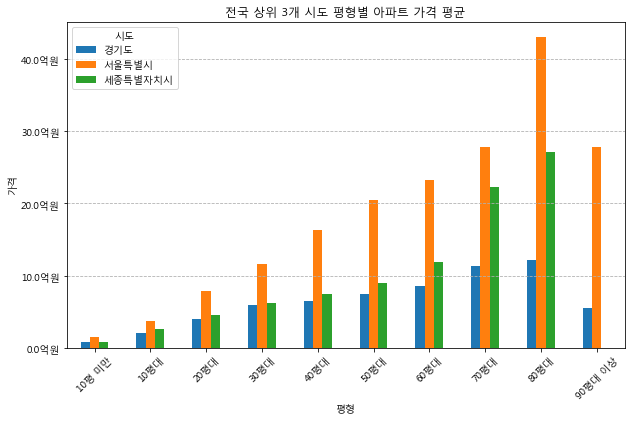

In [23]:
df_filtered_2 = df_apt_tot[df_apt_tot['시도'].isin(['서울특별시', '경기도', '세종특별자치시'])]
grouped_2 = df_filtered_2.groupby(['평형', '시도'])['official_price'].mean().unstack()
ax2 = grouped_2.plot(kind='bar', width = 0.5, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('전국 상위 3개 시도 평형별 아파트 가격 평균')
plt.xlabel('평형')
plt.ylabel('가격')
ax2.xaxis.set_tick_params(rotation=45, labelsize=10)
ax2.grid(True, axis='y', linestyle='--')
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}억원'.format(x*1e-8)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.savefig('전국 상위 3개 평형별 아파트 가격 평균', format='jpeg', dpi=300)
plt.show()

In [13]:
grouped = df_filtered.groupby(['평형', '시군구'])['official_price'].mean().unstack()
grouped

시군구,강남구,서초구,송파구
평형,,,
10평 미만,2.297148e+08,2.141890e+08,1.805536e+08
10평대,7.528999e+08,7.263514e+08,4.628004e+08
20평대,1.599173e+09,1.462203e+09,1.189954e+09
30평대,2.070579e+09,1.862393e+09,1.522694e+09
40평대,2.586700e+09,2.077119e+09,1.769396e+09
50평대,3.094829e+09,2.224308e+09,1.828040e+09
60평대,2.967782e+09,2.381276e+09,1.223952e+09
70평대,3.454546e+09,2.250895e+09,1.980631e+09
80평대,5.706352e+09,2.977519e+09,1.387000e+09


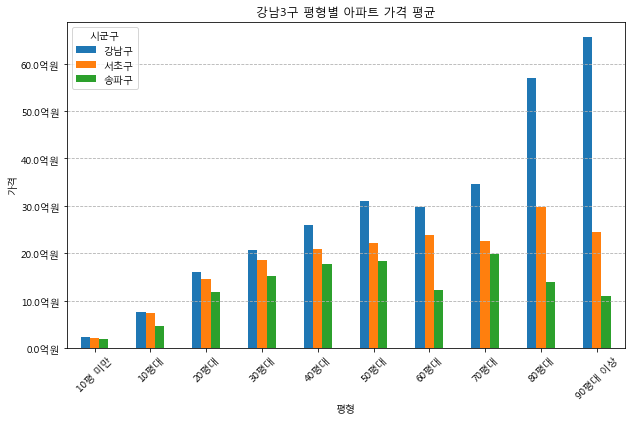

In [21]:
ax = grouped.plot(kind='bar', width = 0.5, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('강남3구 평형별 아파트 가격 평균')
plt.xlabel('평형')
plt.ylabel('가격')
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
ax.grid(True, axis='y', linestyle='--')
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}억원'.format(x*1e-8)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.savefig('강남3구 평형별 아파트 가격 평균', format='jpeg', dpi=300)
plt.show()

In [ ]:
df_filtered = df_apt_seoul[df_apt_seoul['시군구'].isin(['강남구', '서초구', '송파구'])]

# group the dataframe by 평형 and 시군구, and sum the 가격 values
grouped = df_filtered.groupby(['평형', '시군구'])['official_price'].sum().unstack()

# create the bar plot
ax = grouped.plot(kind='bar')

# add titles and labels
plt.title('Price by Area and Region')
plt.xlabel('Area')
plt.ylabel('Price')

# show the plot
plt.show()

<ipython-input-26-9430248d6974>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_seoul[df_apt_seoul['시군구'] == seoul_list[k]].groupby('평형').mean().reset_index()
<ipython-input-26-9430248d6974>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_seoul[df_apt_seoul['시군구'] == seoul_list[k]].groupby('평형').mean().reset_index()
<ipython-input-26-9430248d6974>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function

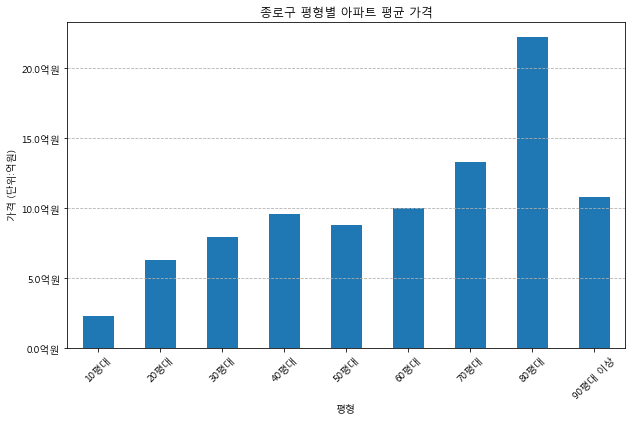

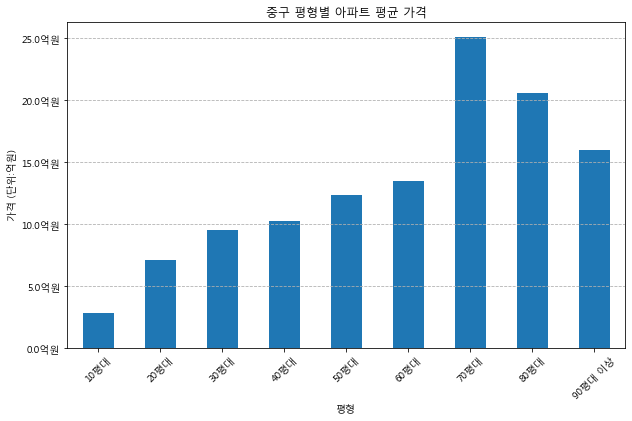

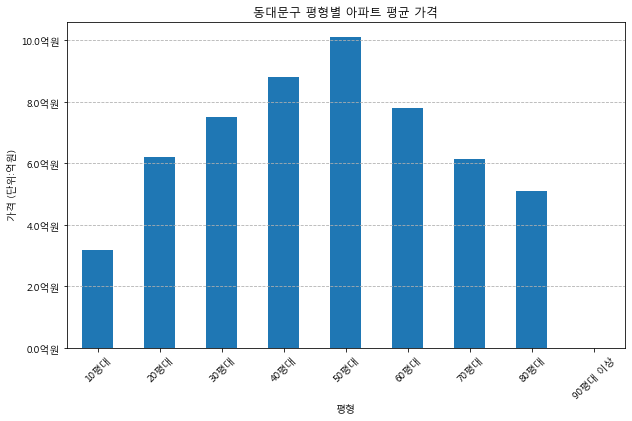

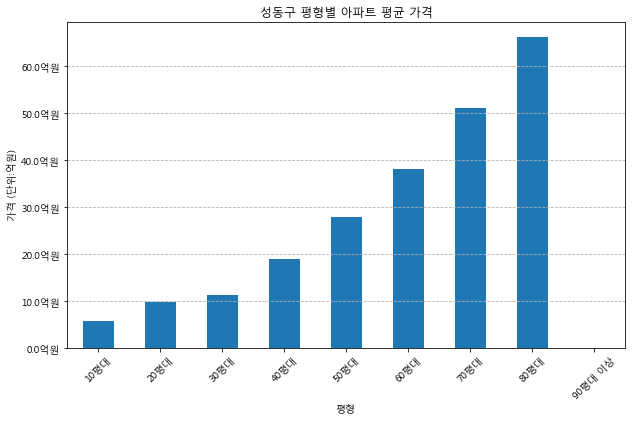

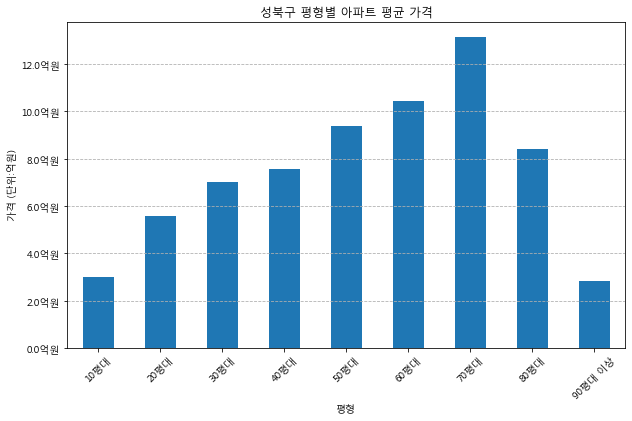

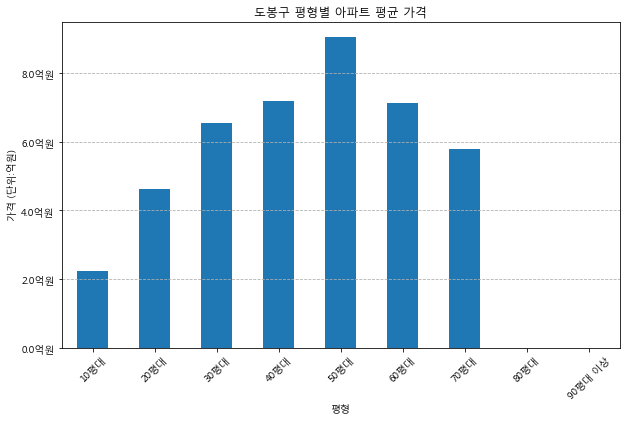

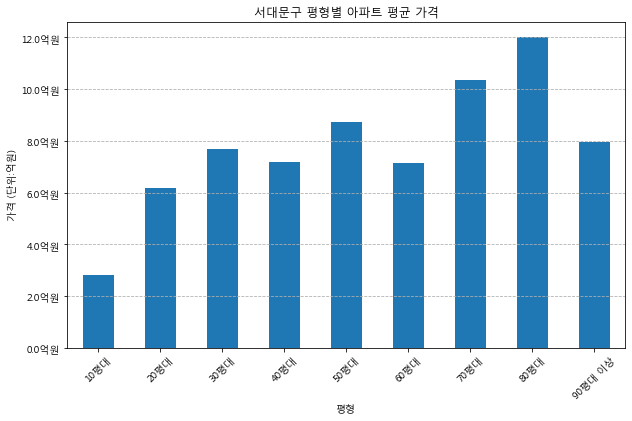

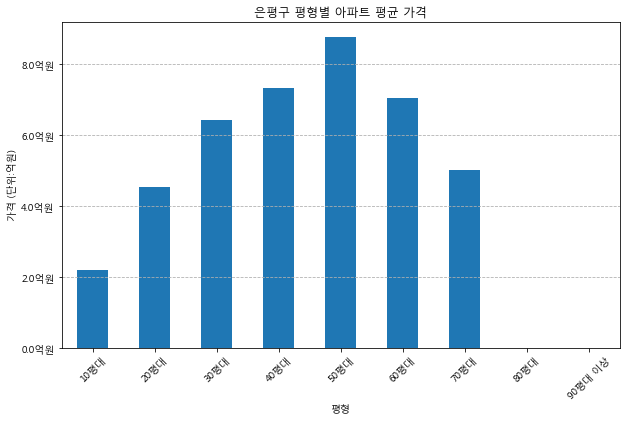

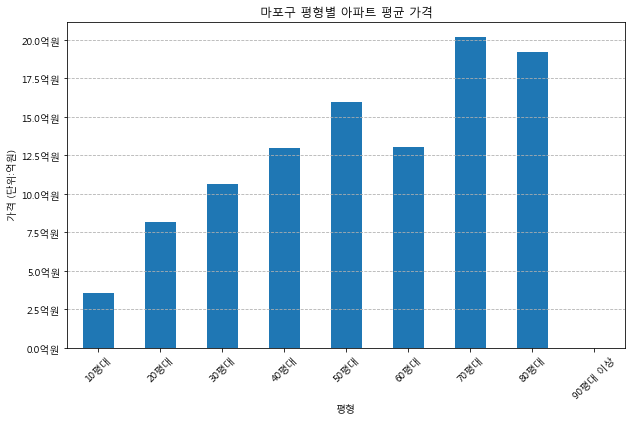

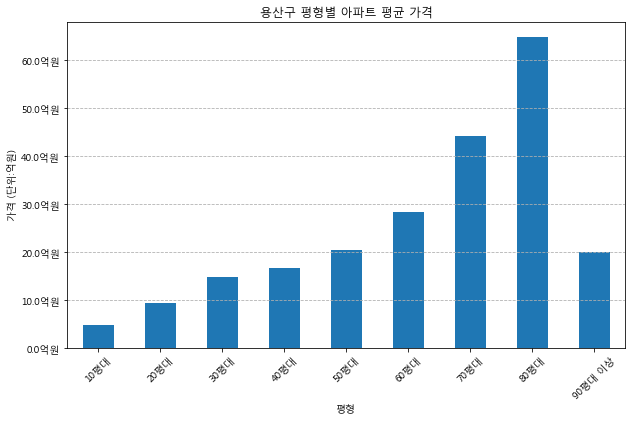

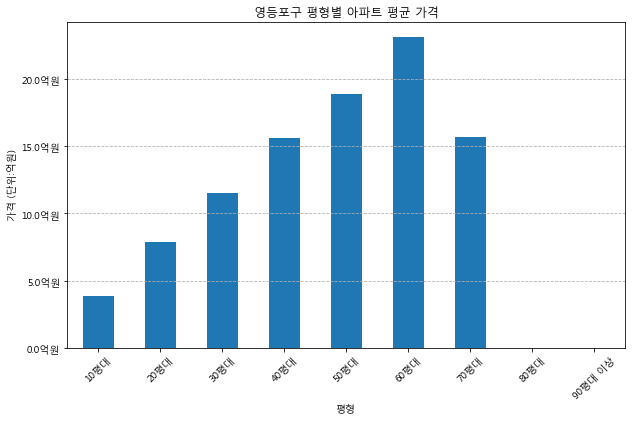

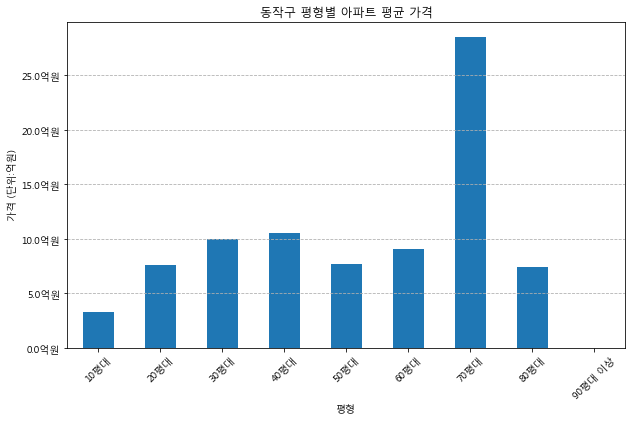

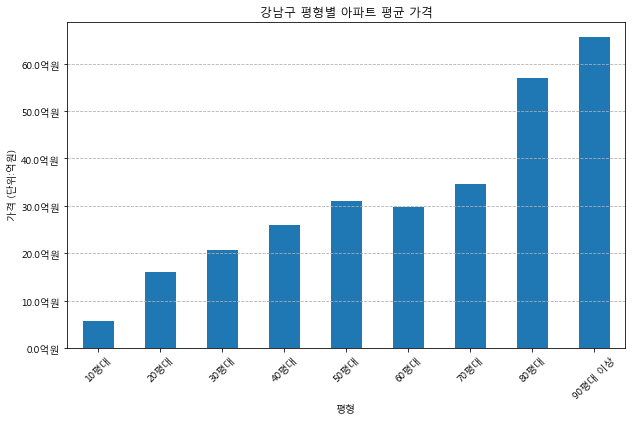

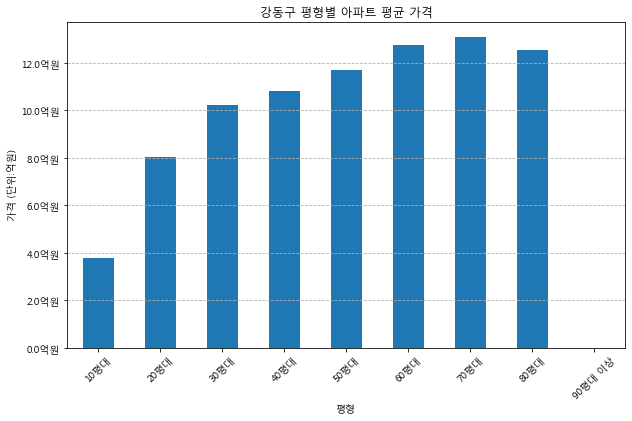

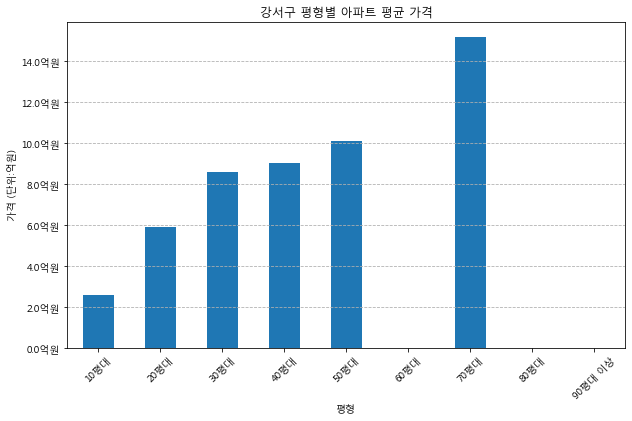

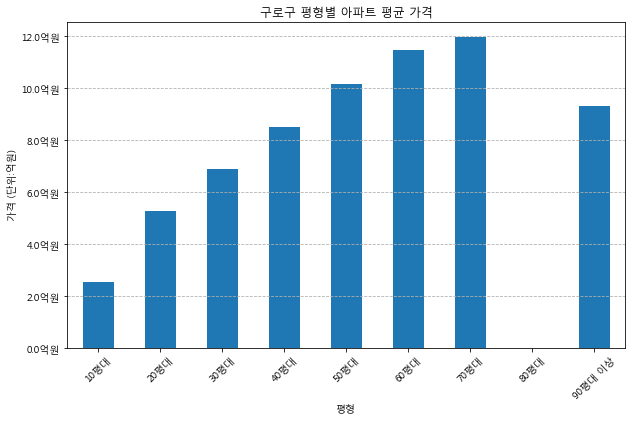

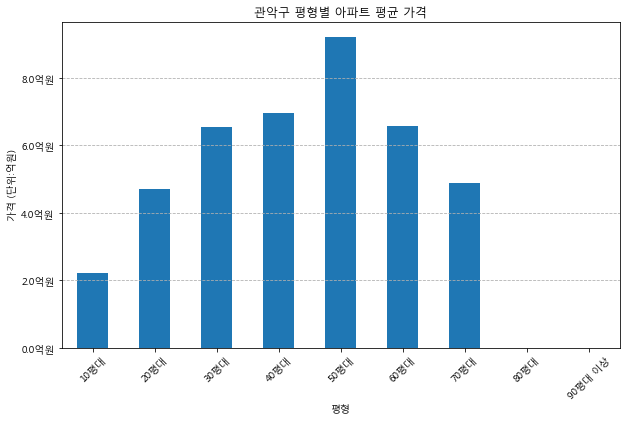

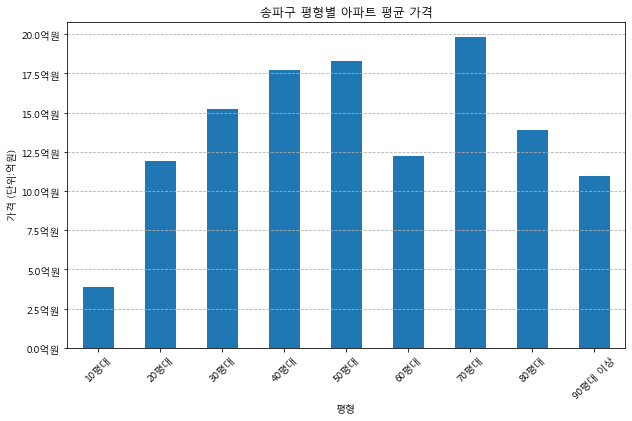

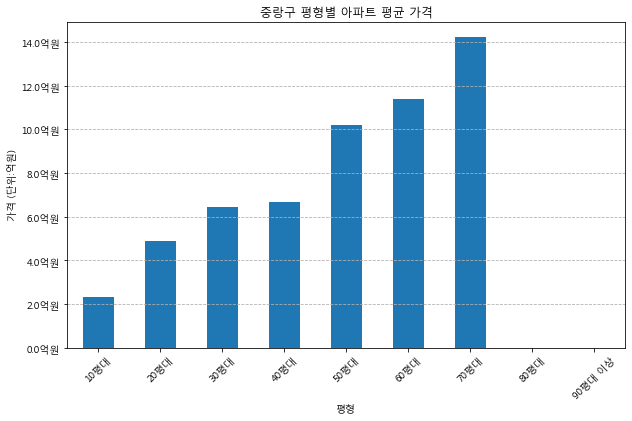

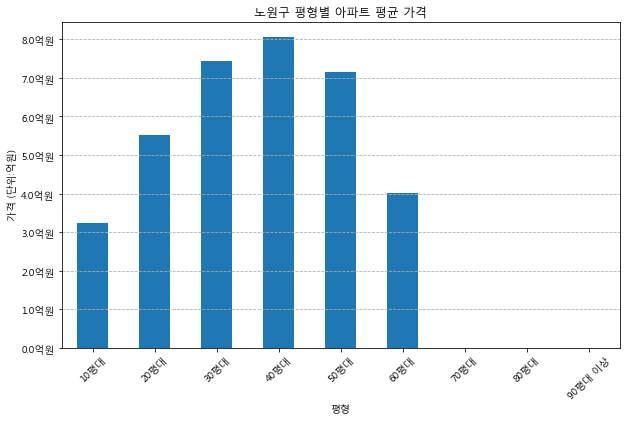

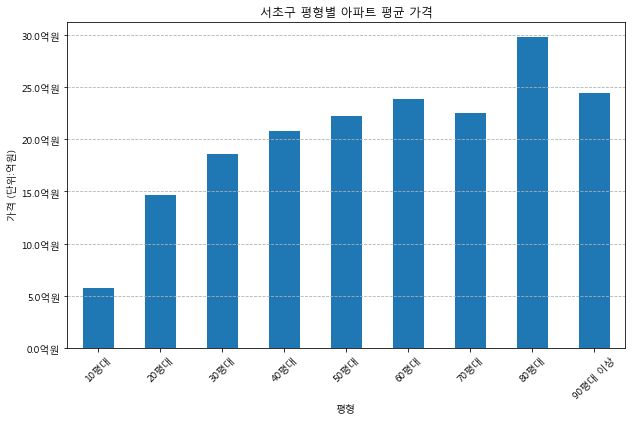

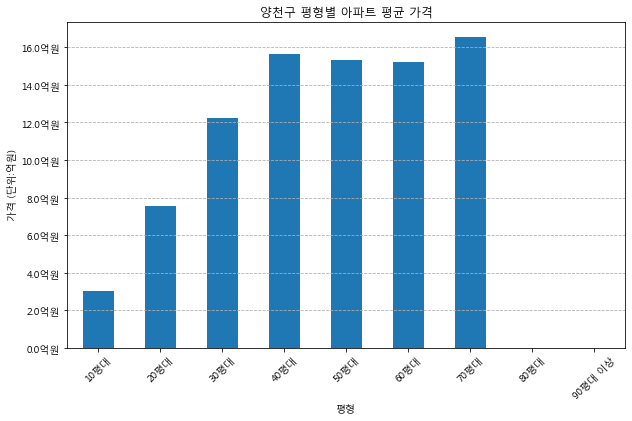

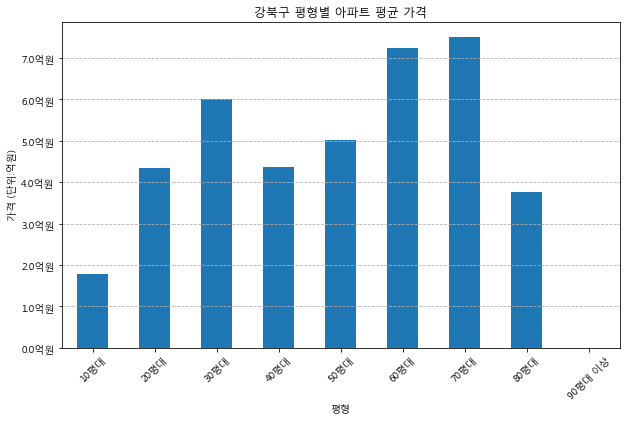

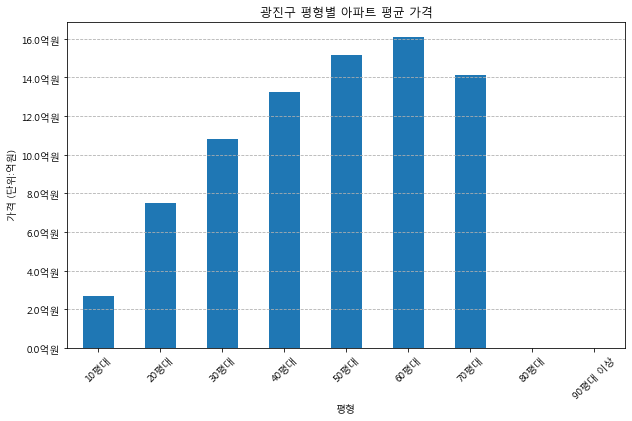

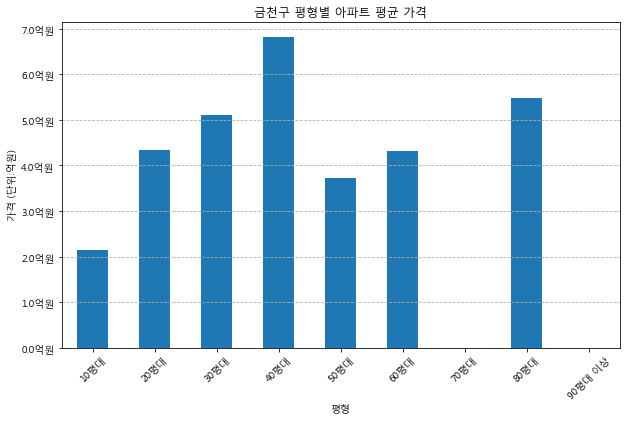

In [26]:
df = df_apt_seoul[df_apt_seoul['시군구'] == seoul_list[k]].groupby('평형').mean().reset_index()
    
    pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

    graph = df.plot(kind='bar', x='평형', y='official_price', width = 0.5, legend = None, figsize=(10,6))
    plt.rc('font', family="Malgun Gothic") 
    plt.title(seoul_list[k]+' 평형별 아파트 평균 가격')
    plt.ylabel('가격 (단위:억원)')
    graph.xaxis.set_tick_params(rotation=45, labelsize=10)
    graph.grid(True, axis='y', linestyle='--')
    def millions(x, pos):
        'The two args are the value and tick position'
        return '{:.1f}억원'.format(x*1e-8)
    graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
    plt.savefig(seoul_list[k]+'평형별', format='jpeg', dpi=300)
    
    k=k+1

In [ ]:
plt.savefig(sido_list[k]+'시군구별', format='jpeg', dpi=300)